# Customer retention plan for Syriatel Mobile Telecom

Author: Kyle Weesner

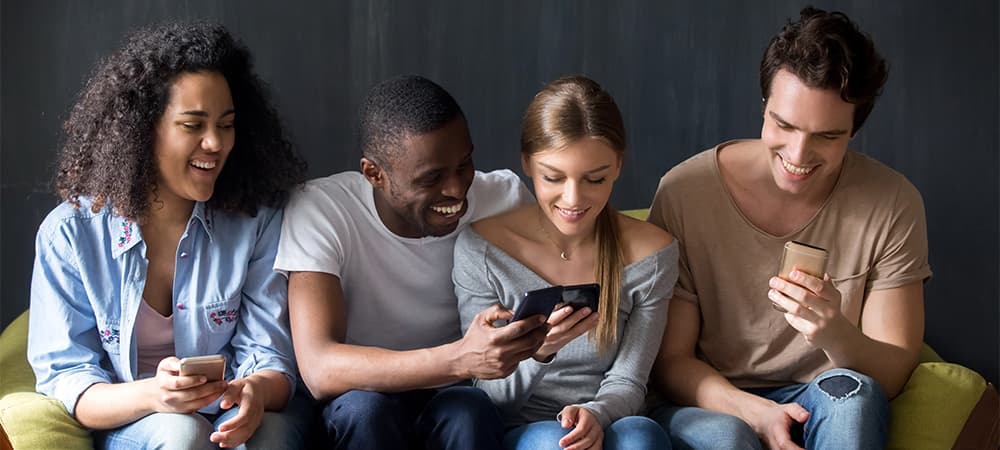

## Overview

Syriatel Mobile Telecom is a service pervider that currently serves more than 8 million people today having 199 international roaming partners in 116 countries.  As a data scientist, I am currently creating a model to predict when might customers churn.  By building a model to help predict when customers will deter away from the service I can either offer additional advice to for the company to allocate resources to make the customer happier and improve our services that may be not opitimal at the time.  This is a great way to see where improvements to the company may need to be done.

## Business Problem

Service providers strive to maintain a healthy balance between gaining new customers while minimizing those who switch providers.  Syriatel provides service to more than 8 million people today and in our data set 15% of customers churned during this time period.  If this sample dataset somewhat resembles the total dataset this company has lost over a million customers.  As a business we want to maximize profit where it can be done without making unhappy customers, so one place this can be done is the retention rate of customers.  With our predictive model, we will improve features in our business that seem to have a correlation with leaving customers and at the same time offer additional support to customers who are considering leaving our service.

## Navigation

Follow through these notebooks in order that are located in the workspace folder in this repository

1. [Data Cleaning and Exploratory Data Analysis](./Data&#32;Cleaning&#32;and&#32;Exploratory&#32;Data&#32;Analysis.ipynb)

2. [Model Building](./Model&#32;Building.ipynb)

3. [Feature Importance Analysis](./Feature&#32;Importance&#32;Analysis.ipynb)

.

.

.

# Feature Importance Analysis

import libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv('../data/clean_df.csv', index_col=0)
# loaded up cleaned data from the data cleaning notebook and had two index colums so set to only have 1
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


# Will be analyzing the top 3 feature importances from my best model
- customer service calls
- total day charge
- international plan

## Customer Service Calls

In [4]:
df_stay = df[df.churn == 0] #data frame of stayed
df_churn = df[df.churn == 1] #data frame of churn

Looking at the distribution of both stayed and churn against total.  To comapre and figure out how to best show feature importance

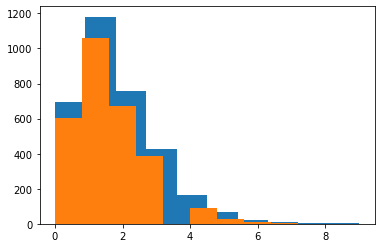

In [5]:
plt.hist(df['customer service calls']), plt.hist(df_stay['customer service calls']);

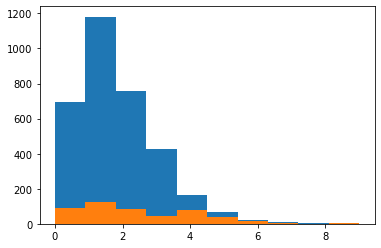

In [6]:
plt.hist(df['customer service calls']), plt.hist(df_churn['customer service calls']);

Look into the percentage of people churned vs total per customer service call. I see how most of the people with the higher amount of calls were churned people. 

In [7]:
df_viz = df.copy() #made a copy to alter for this vizualizations
df_viz.loc[df_viz['customer service calls'] >= 6, 'customer service calls'] = 6 
#binning everything above 6 calls because there are a smaller amount at those numbers

In [8]:
df_viz['customer service calls'].value_counts().sort_index().index #checking to make sure they binned properly

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [9]:
df_viz_churn = df_viz[df_viz.churn==1] #made churn dataset to make percentages

In [10]:
df_viz['customer service calls'].value_counts().sort_index().index.tolist() #current x ticks but will change to show binned 6+

[0, 1, 2, 3, 4, 5, 6]

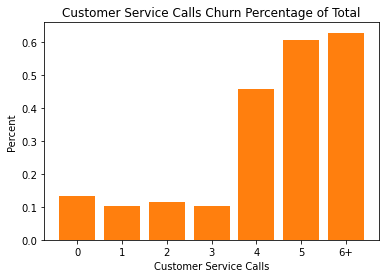

In [11]:
plt.bar((df_viz['customer service calls'].value_counts().sort_index().index), (df_viz_churn['customer service calls'].value_counts().sort_index().values / df_viz['customer service calls'].value_counts().sort_index().values),
       color='tab:orange') #x=index values , height=churn/total (so percent value)

plt.xticks(ticks=df_viz['customer service calls'].value_counts().sort_index().index, labels=['0','1','2','3','4','5','6+']) #x ticks but will change to show binned 6+
plt.xlabel('Customer Service Calls')
plt.ylabel('Percent')
plt.title('Customer Service Calls Churn Percentage of Total')

plt.savefig('../images/customers_service_calls.jpg',
            transparent = False,bbox_inches="tight")
plt.show();

In [12]:
viz_churn = df_viz_churn['customer service calls'].value_counts().sort_index().values #churn values for each call value
viz_total = df_viz['customer service calls'].value_counts().sort_index().values #total values for each call value
viz_percent = np.ndarray.round(viz_churn/viz_total *100, decimals=2) #percent values for each call value
print(f"""
Customer Sevice call: {['0','1','2','3','4','5','6+']} \n
churn : {viz_churn} \n
total : {viz_total} \n
Percent : {viz_percent} %""")



Customer Sevice call: ['0', '1', '2', '3', '4', '5', '6+'] 

churn : [ 92 122  87  44  76  40  22] 

total : [ 697 1181  759  429  166   66   35] 

Percent : [13.2  10.33 11.46 10.26 45.78 60.61 62.86] %


appears that by 4 customers calls ooks like a drastic amount of people drop or switch to a different provider.

.

.

.

## Total Day Charge

looking at the distribution of total day charge between stay and churn.

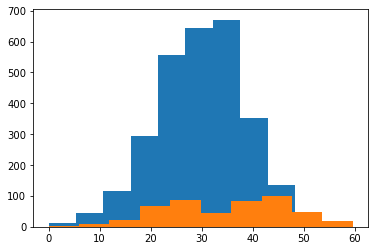

In [13]:
plt.hist(df_stay['total day charge']), plt.hist(df_churn['total day charge']);
#stacking them to possibly see the differences more

Running ttest to see if churn and stay are statisticall different

In [14]:
churn_tdc_list = list(df_churn['total day charge'])
result = stats.ttest_1samp(churn_tdc_list, df_stay['total day charge'].mean())
t_stat, p_value = result
result

Ttest_1sampResult(statistic=10.109228512661401, pvalue=6.4305424235249905e-22)

There is a difference!! (very small p-value)

Look at the mean between the churn and stay.

In [15]:
df_stay['total day charge'].mean(), df_churn['total day charge'].mean()

(29.780421052631578, 35.17592132505176)

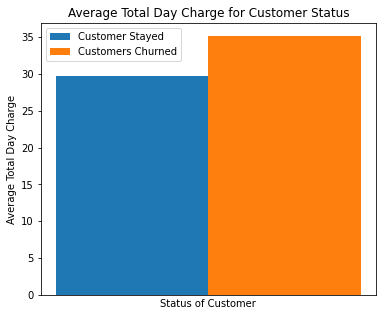

In [16]:
stay_mean = (df_stay['total day charge'].mean()) # values of the first bar
churn_mean = (df_churn['total day charge'].mean())# values of second bar

N = 1 #Numbers of pairs of bars you want
ind = np.arange(N) #Position of bars on x-axis

plt.figure(figsize=(6,5))

width = 0.2      

plt.bar(ind, stay_mean , width, label='Customer Stayed')
plt.bar(ind + width, churn_mean, width, label='Customers Churned')

plt.xlabel('Status of Customer')
plt.ylabel('Average Total Day Charge')
plt.title('Average Total Day Charge for Customer Status')

plt.xticks([]) #removed tick labels

plt.legend(loc='best') # Finding the best position for legends and putting it
plt.show()

Comparing the distribution of churns and stay.   

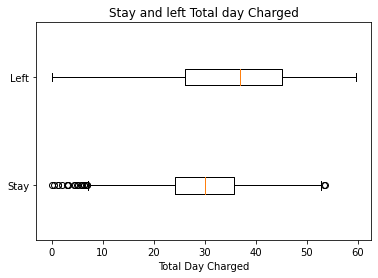

In [17]:
boxs = {'Stay': df_stay['total day charge'], 'Left':df_churn['total day charge']} #made two boxplots to go figure
fig, ax = plt.subplots()
ax.boxplot(boxs.values(), vert=False) #made the pltos horizontal
ax.set_yticklabels(boxs.keys()) #matching boxplots with thir corresponding labels
ax.set_xlabel('Total Day Charged')
ax.set_title('Stay and left Total day Charged');  

In [18]:
churn_tdc_quartiles = np.percentile(churn_tdc_list, [25,50,75]) 
stay_tdc_quartiles = np.percentile(list(df_stay['total day charge']), [25,50,75])

print(f"""
Churn quartiles on total day charged {churn_tdc_quartiles}. \n
Customers still doing service with quartiles on total day charged {stay_tdc_quartiles}."""
)


Churn quartiles on total day charged [26.055 36.99  45.21 ]. 

Customers still doing service with quartiles on total day charged [24.2825 30.12   35.75  ].


We can see that people who churn pay more per day compared to people who stay.  more than 50% of the people who churn are paying more than the 3rd quartile for stayed.

In [19]:
df_stay_viz = df_stay.copy() #made a copy to alter for this vizualizations
df_churn_viz = df_churn.copy() #made a copy to alter for this vizualizations

Creating vaiables for graphs to show the averages in each quartile range.

In [20]:
vc0 = df_churn_viz.loc[df_churn_viz['total day charge'] <= churn_tdc_quartiles[0]] #chruning 0-25%
vc1 = df_churn_viz.loc[(df_churn_viz['total day charge'] <= churn_tdc_quartiles[1]) & (df_churn_viz['total day charge'] >= churn_tdc_quartiles[0])] #chruning 25-50%
vc2 = df_churn_viz.loc[(df_churn_viz['total day charge'] <= churn_tdc_quartiles[2]) & (df_churn_viz['total day charge'] >= churn_tdc_quartiles[1])] #chruning 50-75%
vc3 = df_churn_viz.loc[df_churn_viz['total day charge'] >= churn_tdc_quartiles[2]] #chruning 75-100%
vc_mean = [vc0['total day charge'].mean(), vc1['total day charge'].mean(),vc2['total day charge'].mean(),vc3['total day charge'].mean()] 
#creating a list of averages in each quartile range

vs0 = df_stay_viz.loc[df_stay_viz['total day charge'] <= stay_tdc_quartiles[0]] #stayed 0-25%
vs1 = df_stay_viz.loc[(df_stay_viz['total day charge'] <= stay_tdc_quartiles[1]) & (df_stay_viz['total day charge'] >= stay_tdc_quartiles[0])] #stayed 25-50%
vs2 = df_stay_viz.loc[(df_stay_viz['total day charge'] <= stay_tdc_quartiles[2]) & (df_stay_viz['total day charge'] >= stay_tdc_quartiles[1])] #stayed 50-75%
vs3 = df_stay_viz.loc[df_stay_viz['total day charge'] >= stay_tdc_quartiles[2]] #stayed 75-100%
vs_mean = [vs0['total day charge'].mean(), vs1['total day charge'].mean(),vs2['total day charge'].mean(),vs3['total day charge'].mean()]
#creating a list of averages in each quartile range

In [21]:
print(f'''
churn mean quartiles{vc_mean}, \n
stayed mean quartile{vs_mean}''')


churn mean quartiles[19.819917355371903, 30.462314049586777, 40.98479338842975, 49.45165289256199], 

stayed mean quartile[18.680575035063114, 27.249846368715083, 32.93420979020979, 40.27163865546218]


Plotting our mean quartiles

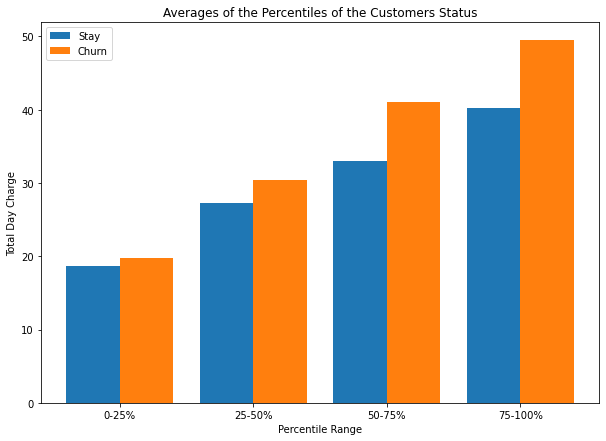

In [27]:
#Plot median performance at the box office

fig,ax = plt.subplots(figsize = (10,7))

labels = ['0-25%','25-50%','50-75%', '75-100%']
#Graphs for median gross/net revenue by the month
x = np.arange(len(labels)) 
w = 0.4

ax.set_title(f'Averages of the Percentiles of the Customers Status')

ax.bar(x-w/2, vs_mean, w)
ax.bar(x+w/2, vc_mean, w)

plt.xticks(x, labels=labels)
ax.set_xlabel('Percentile Range')
ax.set_ylabel('Total Day Charge')

ax.legend(['Stay', 'Churn'])

fig.savefig('../images/customers_status_percentile_averages.jpg',
             transparent = False,bbox_inches="tight", dpi=800);

.

.

.

## International Plan

Looking into the chrun rates in International plan

In [23]:
no_int_len = len(df[df["international plan"]==0]) #count no international plan (blue bar)
int_len = len(df[df["international plan"]==1]) #count of international plan (blue bar)

no_int_chrun_len = len(df.loc[(df["international plan"]==0) & (df.churn == 1)])
#count of churn with no international plan (orange bar)
int_chrun_len = len(df.loc[(df["international plan"]==1) & (df.churn == 1)]) 
#count of churn with international plan (orange bar)

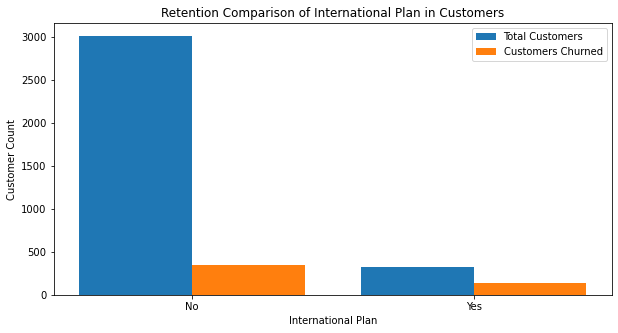

In [24]:
N = 2 # Numbers of pairs of bars you want

total = (no_int_len, int_len) # values of Total Customers
churn = (no_int_chrun_len, int_chrun_len) # values of Customers Churned

ind = np.arange(N) # Position of bars on x-axis

plt.figure(figsize=(10,5))

width = 0.4      

plt.bar(ind, total , width, label='Total Customers')
plt.bar(ind + width, churn, width, label='Customers Churned')

plt.xlabel('International Plan')
plt.ylabel('Customer Count')
plt.title('Retention Comparison of International Plan in Customers')

# xticks()
plt.xticks(ind + width / 2, ('No', 'Yes')) 
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations


plt.legend(loc='best') # Finding the best position for legends and putting it
plt.savefig('../images/retention_comparison_interrnational_plan.jpg')
plt.show();

In [25]:
no_international_churn = no_int_chrun_len / no_int_len *100 #percentage of churn with no plan

international_churn = int_chrun_len / int_len *100 #percentage of churn with plan

print(f' Percent of people who churn when they do not have an international plan {round(no_international_churn)}%')
print(f' Percent of people who churn when they do have an international plan {round(international_churn)}%')

 Percent of people who churn when they do not have an international plan 11%
 Percent of people who churn when they do have an international plan 42%


Customers must be unhappy with the international plan if such a large portion of people are leaving.

.

.

.

## Conclusion

I would focus on improving customer service with priotizing keeping customer serrvice calls under 4.

Implement new payment plans per amount of data usage that are better cost efficient for the customer or have monthly plans. 

The current international plan needs to be evaluated and changed due to large proportion using end up leaving.